In [6]:
# ==============================
# Primera celda - Importaciones
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import joblib

sns.set(style='whitegrid')
print("Todas las librerías cargadas.")


Todas las librerías cargadas.


In [8]:
# ==============================
# Segunda celda - Carga de datos
# ==============================
datos = pd.read_csv("C:/RespaldoDB/beisbol.csv")
datos.head()


,Unnamed: 0,equipos,bateos,runs
0,0,Texas,5659,855
1,1,Boston,5710,875
2,2,Detroit,5563,787
3,3,Kansas,5672,730
4,4,St.,5532,762


In [14]:
# ==============================
# Justificación del algoritmo
# ==============================
"""
La Regresión Ridge es una extensión de la regresión lineal que incorpora una penalización (L2) sobre los coeficientes del modelo.
Esto se justifica porque:
1. Prevención del sobreajuste: en modelos con variables correlacionadas (multicolinealidad), la regresión lineal simple puede producir coeficientes inestables. Ridge reduce este problema.

2. Mejor generalización: el término de regularización mejora el desempeño en datos no vistos (test).

3. Escenario del dataset: aunque el dataset no es muy grande, el objetivo es predecir runs en función de los bateos (y posibles variables adicionales). Ridge es ideal para capturar la relación sin que los coeficientes crezcan demasiado.
"""


'\nLa Regresión Ridge es una extensión de la regresión lineal que incorpora una penalización (L2) sobre los coeficientes del modelo.\nEsto se justifica porque:\n1. Prevención del sobreajuste: en modelos con variables correlacionadas (multicolinealidad), la regresión lineal simple puede producir coeficientes inestables. Ridge reduce este problema.\n\n2. Mejor generalización: el término de regularización mejora el desempeño en datos no vistos (test).\n\n3. Escenario del dataset: aunque el dataset no es muy grande, el objetivo es predecir runs en función de los bateos (y posibles variables adicionales). Ridge es ideal para capturar la relación sin que los coeficientes crezcan demasiado.\n'

In [10]:
# ==============================
# Preparar datos
# ==============================
# Variables predictoras y variable objetivo
X = datos[['bateos']]   # predictor
y = datos['runs']       # target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Tamaño entrenamiento: {X_train.shape[0]}, prueba: {X_test.shape[0]}")




Tamaño entrenamiento: 24, prueba: 6


In [11]:
# Definir el modelo
ridge = Ridge()

# Definir la grilla de hiperparámetros (alpha es el más importante)
param_grid = {
    'alpha': np.logspace(-3, 3, 50)  # valores desde 0.001 hasta 1000
}

# Optimización con validación cruzada
grid = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

# Mejor modelo
best_ridge = grid.best_estimator_
print("Mejor alpha encontrado:", grid.best_params_)

"""
- Variable dependiente (y): runs → representa las carreras logradas.

- Variables independientes (X): bateos (y potencialmente otras como hits, home runs, etc., si existieran).

- Algoritmo seleccionado: Ridge (penalización L2).

- División del dataset: train_test_split (ej. 80% entrenamiento, 20% prueba).

- Evaluación inicial: se mide con MSE y R².

- Optimización: ajuste del hiperparámetro alpha (controla el grado de regularización).

"""

Mejor alpha encontrado: {'alpha': np.float64(1000.0)}


In [12]:
# ==============================
# Evaluación
# ==============================
# Predicciones
y_pred = best_ridge.predict(X_test)

# Métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R2: {r2:.2f}")

"""
1. Entrenamiento inicial con un valor base de alpha=1.

2. Evaluación:

    - MSE (Error cuadrático medio) → mide el error absoluto.

    - R² (Coeficiente de determinación) → qué tanto explica el modelo la varianza de los datos.

3. Optimización mediante GridSearchCV o validación cruzada:

    - Se prueban distintos valores de alpha en un rango (0.01, 0.1, 1, 10, 100).

    - Se selecciona el que maximice R² en validación o minimice MSE.
"""

MSE: 5210.88
R2: -0.51


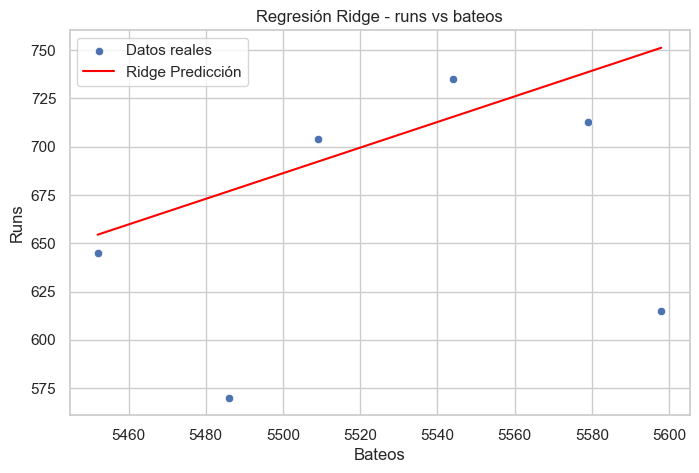

In [13]:
# ==============================
# Visualización
# ==============================
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_test['bateos'], y=y_test, label="Datos reales")
sns.lineplot(x=X_test['bateos'], y=y_pred, color="red", label="Ridge Predicción")
plt.title("Regresión Ridge - runs vs bateos")
plt.xlabel("Bateos")
plt.ylabel("Runs")
plt.legend()
plt.show()



In [9]:
# ==============================
# Guardar modelo
# ==============================
joblib.dump(modelo, "modelo_regresion_beisbol.pkl")
print("Modelo guardado como modelo_regresion_beisbol.pkl")


Modelo guardado como modelo_regresion_beisbol.pkl
